# week 9 Exercise Feature space

## Ex 1
`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)
  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

# Status

# Solution part 1

In [1]:
import pandas as pd
csv_data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'

df = pd.read_csv(csv_data)

headers = df.head()
headers

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


## Solution part 2

In [2]:
make_honda = df[df['Identification.Make'] == "Honda"]
#print(make_honda)

gasoline = df[df['Fuel Information.Fuel Type'] == "Gasoline"]
#print(gasoline)

outliers = df[df['Engine Information.Engine Statistics.Horsepower'] < df['Engine Information.Engine Statistics.Horsepower'].quantile(0.90)]
#print(outliers)

two_features = df[['Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower']]
#print(two_features)

from sklearn import preprocessing
scalar = preprocessing.MinMaxScaler()
names = two_features.columns
data = scalar.fit_transform(two_features)
scaled_df = pd.DataFrame(data, columns=names)
scaled_df

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,0.066038,0.278810
1,0.080189,0.185874
2,0.089623,0.185874
3,0.080189,0.185874
4,0.080189,0.185874
...,...,...
5071,0.066038,0.278810
5072,0.042453,0.840149
5073,0.042453,0.840149
5074,0.066038,0.399628


## Solution 3

coefficient: [-0.09472227]
y predicted by x = 1: [-0.00279081]


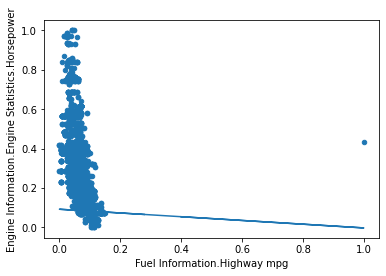

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
x = scaled_df['Engine Information.Engine Statistics.Horsepower']
x_reshape = np.array(x).reshape(-1,1)
y = scaled_df['Fuel Information.Highway mpg']

model = LinearRegression()
model.fit(x_reshape, y)

coef = model.coef_
print("coefficient: " + str(coef))
#The coefficient means that the data falls linear by coefficient

pred_y = model.predict([[1]])
print("y predicted by x = 1: " + str(pred_y))

scaled_df.plot.scatter(x=0, y=1)
m, b = np.polyfit(x,y,1)

plt.plot(x,(coef*x+b))